# SAFECAT works

The SAFECAT is the combined SPIRE Spectral Feature Finder Catalogue from _sparse_ and _mapping_ observations.

In [34]:
import os

from astropy.table import Table
import astropy.units as u
from astropy.io import fits
import astropy.coordinates as coord
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
%matplotlib inline

home = os.path.expanduser('~')
wdir = home + '/Dropbox/Work/featureFinder/FFv2'

In [2]:
t = Table.read('{}/SPIRE/FFv2/jeremy2/CombinedCatalogue.fits'.format(home))
#t = Table.read('{}/CombinedCatalogue.fits.gz'.format(wdir))
#t = Table.read('{}/Dropbox/Combined Catalogue/CombinedCatalogue_clean.fits'.format(home))
#df = t.to_pandas()
nt = len(t)
# strip blanks in columns 'extent','calibration','sampling'
for icol in ['extent','calibration','sampling','velFlag']:
    #t[icol] = np.char.strip(t[icol].data.map(lambda x: x.decode().strip())
    t[icol] = np.char.strip(t[icol])
# save to a new fits table with the blank-stripped columns
t.write(('{}/SPIRE/FFv2/jeremy2/CombinedCatalogue_clean.fits'.format(home)),format='fits',overwrite=True)
uxx, indices = np.unique(t['obsid'], return_index=True)
nobs = len(uxx)
#
print ("Total of {} features from {} different observations".format(nt,nobs))
isparse = np.where(t['sampling'][indices] == 'sparse')[0]
ifull = np.where(t['sampling'][indices] == 'full')[0]
iinter = np.where(t['sampling'][indices] == 'intermediate')[0]
print ("    sparse: {}, full: {} and intermediate: {}".format(len(isparse),len(ifull),len(iinter)))

Total of 167507 features from 820 different observations
    sparse: 641, full: 54 and intermediate: 125


In [3]:
#
# check those at SNR > 5
df = t.to_pandas()
n0 = len(np.where(np.abs(df.SNR) >= 5.0)[0])
print ("Total of {} features with |SNR| >= 5.0 ({:.1f} %)".format(n0,100*n0/nt))

Total of 167507 features with |SNR| >= 5.0 (100.0 %)


In [4]:
i5 = np.where(np.abs(df.SNR) < 5.0)[0]
print ("Total of {} features at SNR < 5, with mode".format(len(i5)),np.unique(df.sampling[i5]))
print ("From {} observations".format(len(np.unique(df.obsid[i5]))))

Total of 0 features at SNR < 5, with mode []
From 0 observations


In [5]:
# the distribution of those with SNR < 5
#plt.hist(df.SNR,range=(-5,5),bins=11)

/home/ivaltchanov/miniconda3/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


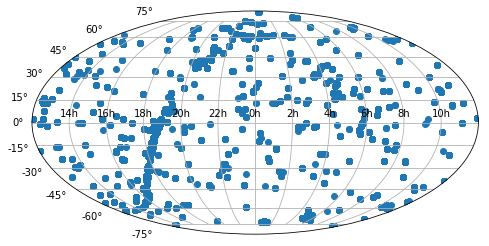

In [6]:
# plotting
ra = coord.Angle(df.ra.values*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df.dec.values*u.degree)
#
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)


In [7]:
t.info

<Table length=167507>
     name       dtype   unit  n_bad
-------------- ------- ------ -----
         obsid   int32            0
         opDay   int32            0
     frequency float64    GHz     0
frequencyError float64    GHz     0
           SNR float64            0
         array  bytes3            0
           row   int32            0
        column   int32            0
            ra float64            0
           dec float64            0
   featureFlag float64            0
      velocity float64 km / s 24822
        velErr float64 km / s 24838
       velFlag  bytes5            0
        extent bytes12            0
   calibration bytes14            0
      sampling bytes12            0
         hpdp&   int32            0
           bgs   int32            0
       NccFlag   int32            0

In [11]:
qq,nq = np.unique(df.velFlag, return_counts=True)

for i,iq in enumerate(qq):
    print ("{} n={}, {:.1f}%".format(qq[i].decode(),nq[i],100*nq[i]/n0))


FF n=8784, 5.2%
FF? n=131735, 78.6%
S? n=31, 0.0%
W17 n=54, 0.0%
XCOR n=690, 0.4%
XCOR? n=1391, 0.8%
nan n=24822, 14.8%


In [12]:
m1 = t['velFlag'] == 'W17'

In [13]:
im1 = np.where(m1)[0]

In [14]:
len(im1)

54

## Checking individual catalogues



In [17]:
pcats = glob.glob('/home/ivaltchanov/SPIRE/FFv2/jeremy2/Modified/HRpointProducts/featureCatalogues/*.fits')
ncats = len(pcats)
print ("Found {} individual catalogues".format(ncats))

Found 818 individual catalogues


In [37]:
# now loop over all and check how many have zero detections
no_feat = []
for ifile in pcats:
    hdu = fits.open(ifile)
    if ((hdu[1].header['N_SSW'] == 0) and (hdu[1].header['N_SLW'] == 0)):
        iobs = os.path.basename(ifile).split('_')[0]
        print ("Zero detection in {}".format(iobs))
        no_feat.append(iobs)
print ("In total: {} zero detections files".format(len(no_feat)))

Zero detection in 1342242594
Zero detection in 1342247764
Zero detection in 1342191204
Zero detection in 1342197468
Zero detection in 1342239345
Zero detection in 1342259582
Zero detection in 1342242593
Zero detection in 1342216886
Zero detection in 1342253966
Zero detection in 1342204932
Zero detection in 1342250516
Zero detection in 1342245870
Zero detection in 1342237006
Zero detection in 1342192187
Zero detection in 1342256084
Zero detection in 1342197467
Zero detection in 1342239344
Zero detection in 1342219552
Zero detection in 1342259581
Zero detection in 1342214852
Zero detection in 1342243641
Zero detection in 1342253672
Zero detection in 1342245864
Zero detection in 1342256083
Zero detection in 1342243623
Zero detection in 1342247769
Zero detection in 1342256358
Zero detection in 1342265843
Zero detection in 1342257925
Zero detection in 1342216884
Zero detection in 1342253671
Zero detection in 1342257912
Zero detection in 1342265812
Zero detection in 1342227518
Zero detection

In [33]:
# now select a random one to inspect
xfile = np.random.choice(pcats,size=1)
xcat = Table.read(xfile[0])
xcat.info()
xcat
xcat.meta

<Table length=28>
     name       dtype  unit
-------------- ------- ----
     frequency float64  GHz
frequencyError float64  GHz
           SNR float64     
      detector  bytes5     
   featureFlag float64     
      NCC_flag   int32     


OrderedDict([('LONGSTRN', 'OGIP 1.0'),
             ('comments',
              ['This FITS file may contain long string keyword values that are',
               "continued over multiple keywords.  This convention uses the  '&'",
               'character at the end of a string which is then continued',
               "on subsequent keywords whose name = 'CONTINUE'.",
               'Column entry true if the Neutral Carbon Check added or modified the fea&',
               'ture',
               're based on background subtracted data, not the standard product availa&',
               'ble in the Herschel Science Archive',
               'Calibration scheme applied to spectral data used',
               'imate',
               'Spatial extent classification of source. If "extended" or "semiExtended&',
               '" the extended-source calibrated Feature Finder results may be needed']),
             ('',
              [' -------------- Herschel Structure Data--------------------',
   

In [27]:
xfile

array(['/home/ivaltchanov/SPIRE/FFv2/jeremy2/Modified/HRpointProducts/featureCatalogues/1342250527_featuresFound_new.fits'],
      dtype='<U116')

In [28]:
qfile = '/home/ivaltchanov/SPIRE/FFv2/jeremy2/Modified/HRpointProducts/featureCatalogues/1342250527_featuresFound_new.fits'
qtab = Table.read(qfile)

VerifyError: Unparsable card (RV_ERR), fix it first with .verify('fix').

In [32]:
from astropy.io import fits
hdu = fits.open(qfile)
hdu[1].header

 [astropy.io.fits.verify]


XTENSION= 'BINTABLE'           / marks beginning of new HDU                     
BITPIX  =                    8 / bits per data value                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                   37                                                  
NAXIS2  =                    0 / size of the n'th axis                          
PCOUNT  =                    0 / Required value                                 
GCOUNT  =                    1 / Required value                                 
TFIELDS =                    6                                                  
LONGSTRN= 'OGIP 1.0'           / The OGIP long string convention may be used.   
COMMENT This FITS file may contain long string keyword values that are          
COMMENT continued over multiple keywords.  This convention uses the  '&'        
COMMENT character at the end of a string which is then continued                
COMMENT on subsequent keywor